In [2]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

In [3]:
#pre proccessing for g-data 
gColumns=['x','y'] 
gData = pd.read_csv('g-data.csv', names=gColumns)
#gData = gData.drop(['Class'], axis=1)
gData

,x,y
0,8.724514,16.680705
1,8.111094,14.039865
2,3.891538,11.217337
3,6.595019,16.108606
4,9.159665,15.282327
...,...,...
245,3.156732,13.434926
246,6.588365,15.036372
247,7.806401,13.882248
248,8.672002,14.524847


In [4]:
#pre proccessing for compound data
compoundColumns=['x','y','Class'] 
compoundData = pd.read_csv('compound.txt', delimiter=r"\s+", names=compoundColumns)
compoundData = compoundData.drop(['Class'], axis=1)
compoundData

,x,y
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95
...,...,...
394,15.85,9.95
395,15.35,9.90
396,15.60,9.45
397,15.30,9.15


In [5]:
#pre proccessing for flame data
flameColumns=['x','y','Class'] 
flameData = pd.read_csv('flame.txt', delimiter=r"\s+", names=flameColumns)
flameData = flameData.drop(['Class'], axis=1)
flameData

,x,y
0,1.85,27.80
1,1.35,26.65
2,1.40,23.25
3,0.85,23.05
4,0.50,22.35
...,...,...
235,7.50,26.20
236,7.50,25.65
237,7.05,25.85
238,6.90,27.15


In [6]:
#pre proccessing for pathbased data
pathbasedColumns=['x','y','Class'] 
pathbasedData = pd.read_csv('pathbased.txt', delimiter=r"\s+", names=pathbasedColumns)
pathbasedData = pathbasedData.drop(['Class'], axis=1)
pathbasedData

,x,y
0,11.25,5.05
1,10.95,4.70
2,9.85,5.80
3,9.80,5.75
4,9.15,6.80
...,...,...
295,17.50,18.05
296,16.65,17.50
297,15.45,17.30
298,15.45,17.80


## part I

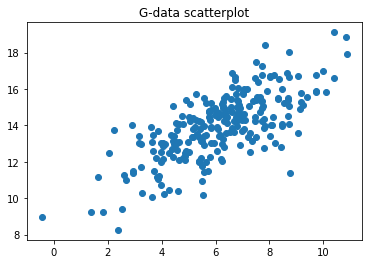

In [74]:
x=gData['x']
y = gData['y']

plt.scatter(x,y)
plt.title("G-data scatterplot")
plt.show()

In [75]:
N,d = gData.shape
delta = pd.DataFrame(100*np.divide(gData.iloc[1:,:].values-gData.iloc[:N-1,:].values, gData.iloc[:N-1,:].values),
                    columns=gData.columns, index=gData.iloc[1:].index)
delta.head()

,x,y
1,-7.030985,-15.831705
2,-52.022034,-20.103668
3,69.470748,43.604546
4,38.887630,-5.129428
5,-43.540363,-5.833449


<function matplotlib.pyplot.show(*args, **kw)>

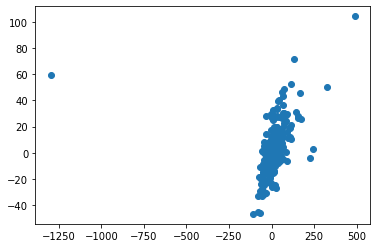

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(delta.x,delta.y)
plt.show

In [77]:
meanValue = delta.mean()
covValue = delta.cov()
print(meanValue)
print(covValue)

x    7.179819
y    1.791243
dtype: float64
              x           y
x  10934.671016  576.957384
y    576.957384  410.127913


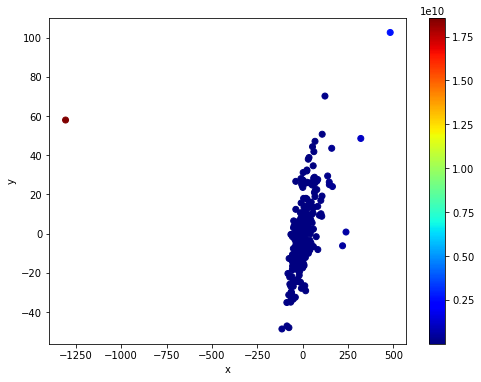

In [78]:
from numpy.linalg import inv

X = delta.values
S = covValue.values
for i in range(2):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)



fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
p = ax.scatter(delta.x,delta.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [79]:
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
9,-1306.485785,57.956323,1.857845e+10
89,483.136234,102.631068,2.613914e+09
95,320.982000,48.557642,1.145545e+09
39,239.419188,0.813120,6.270172e+08
68,220.511039,-6.206315,5.301363e+08


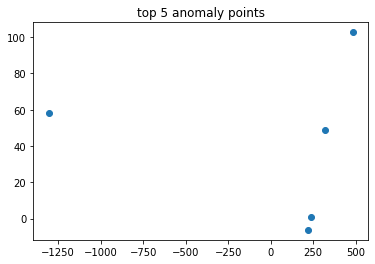

In [80]:
anoms = result.nlargest(5,'Anomaly score')
anoms = anoms.drop(['Anomaly score'], axis=1)
anoms
plt.scatter(anoms['x'], anoms['y'])
plt.title('top 5 anomaly points')
plt.show()

## Part 2

Compound data

K = 1

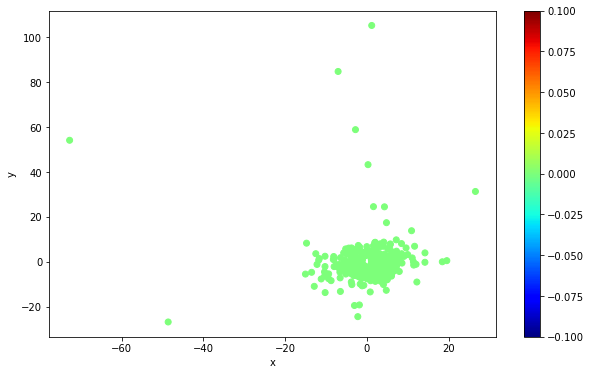

In [81]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [82]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,11.401869,0.000000,0.0
2,5.872483,-4.740406,0.0
3,-12.202853,-1.184834,0.0
4,7.942238,-4.316547,0.0
5,-10.367893,-4.511278,0.0


for k = 1 all the points are compared to themselves so all distances are the same

k =2

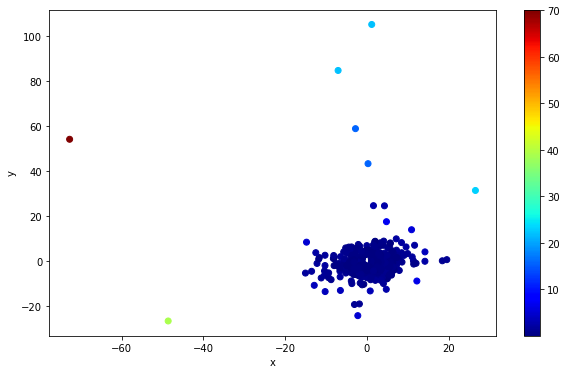

In [83]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [84]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
142,-72.781065,54.137931,70.155389
225,-48.648649,-26.822157,39.138284
181,26.587302,31.329114,23.303199
38,1.191895,105.294118,22.084883
315,-7.038123,84.800000,22.084883


k = 5

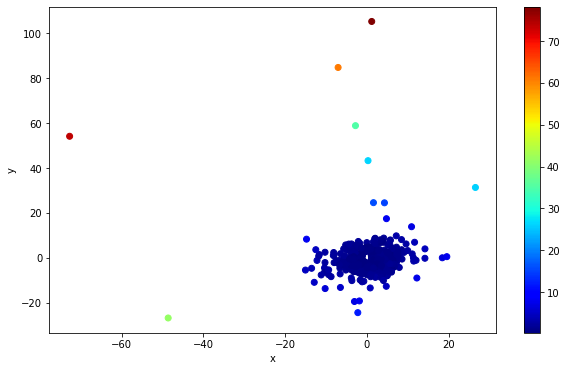

In [85]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [86]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
38,1.191895,105.294118,78.203251
142,-72.781065,54.137931,73.937501
315,-7.038123,84.800000,60.857482
225,-48.648649,-26.822157,41.512695
383,-2.785515,58.870968,35.105786


Flame Data

k = 1

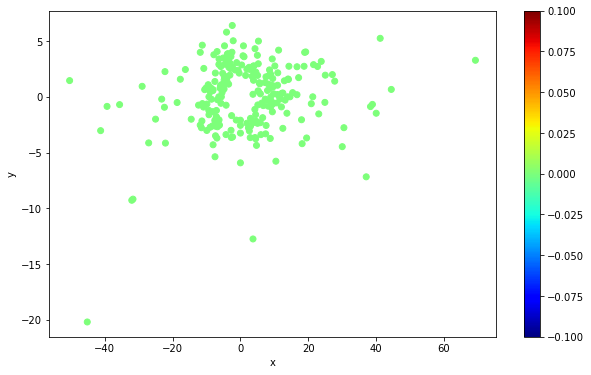

In [87]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)

knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [88]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,-27.027027,-4.136691,0.0
2,3.703704,-12.757974,0.0
3,-39.285714,-0.860215,0.0
4,-41.176471,-3.036876,0.0
5,30.000000,-4.474273,0.0


k = 2

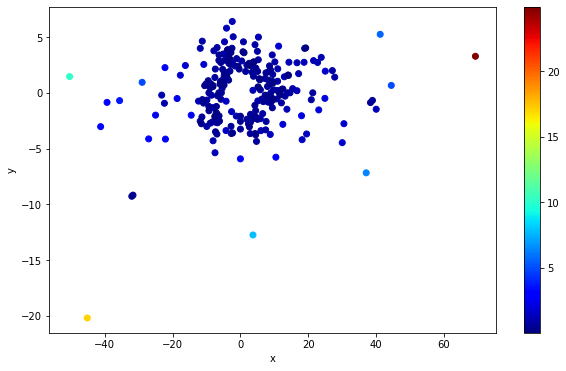

In [89]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)


knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [90]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
6,69.230769,3.278689,24.924037
149,-45.112782,-20.208333,17.066009
194,-50.314465,1.455301,10.182466
2,3.703704,-12.757974,7.769699
106,37.058824,-7.180851,6.419998


k = 5

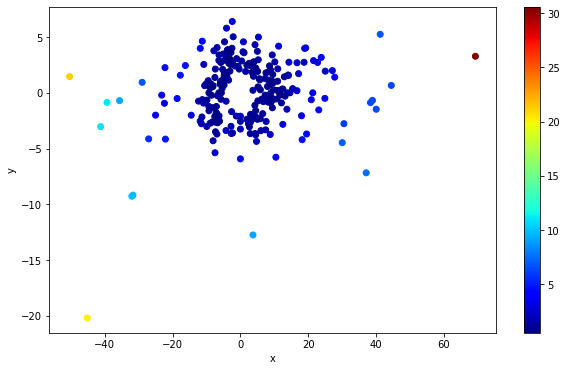

In [91]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [92]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
6,69.230769,3.278689,30.599270
194,-50.314465,1.455301,21.231794
149,-45.112782,-20.208333,20.206543
3,-39.285714,-0.860215,11.138701
4,-41.176471,-3.036876,11.102053


pathbased Data

k = 1

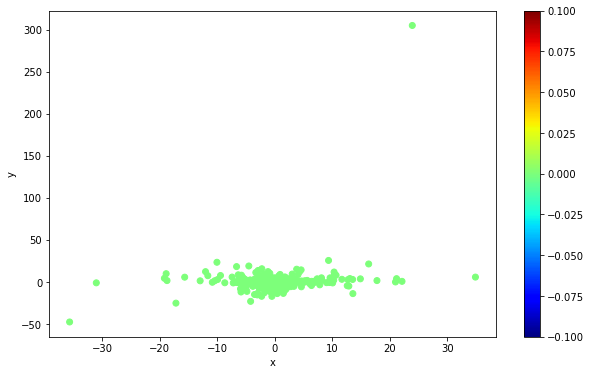

In [93]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [94]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,-2.666667,-6.930693,0.0
2,-10.045662,23.404255,0.0
3,-0.507614,-0.862069,0.0
4,-6.632653,18.260870,0.0
5,-5.464481,-2.941176,0.0


k = 2

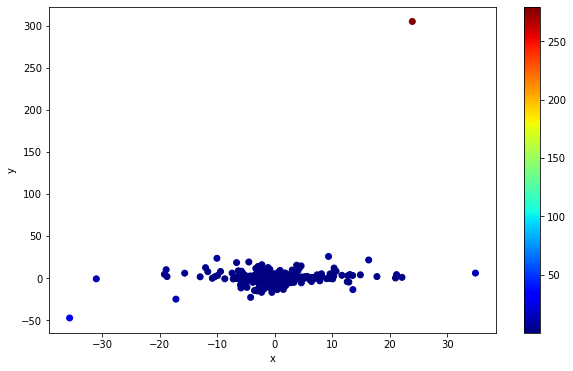

In [95]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [96]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
103,23.921569,304.878049,279.684876
202,-35.658915,-47.564470,29.038232
267,34.899329,5.789474,13.730102
119,-17.173524,-25.170068,13.157033
266,-31.018519,-1.041667,12.584024


k = 5

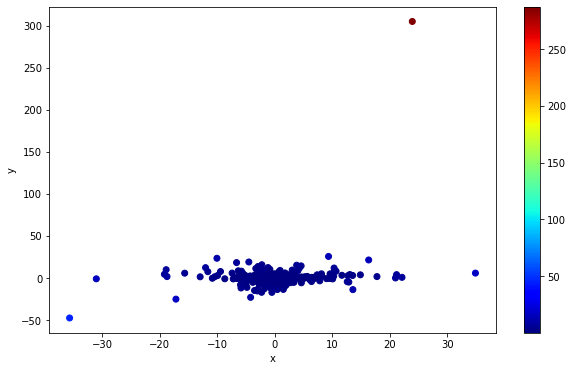

In [97]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [98]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
103,23.921569,304.878049,287.299986
202,-35.658915,-47.564470,45.810518
267,34.899329,5.789474,17.614966
119,-17.173524,-25.170068,17.187414
266,-31.018519,-1.041667,16.775617


## part 3

Compound data

Density is the inverse of distance to k’th neighbour

k =1

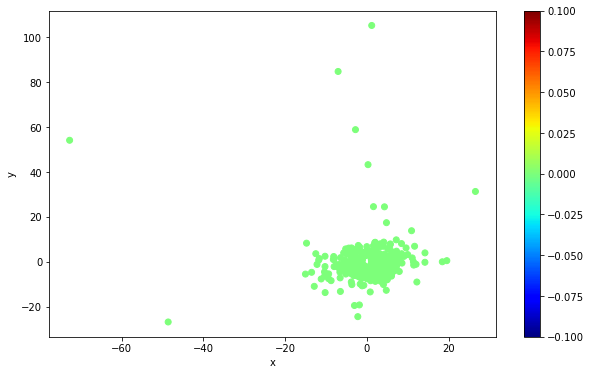

In [99]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)



anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [100]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,11.401869,0.000000,0.0
2,5.872483,-4.740406,0.0
3,-12.202853,-1.184834,0.0
4,7.942238,-4.316547,0.0
5,-10.367893,-4.511278,0.0


For k = 1 the distances between the points is always 0 so they cannot be inverted

k=2

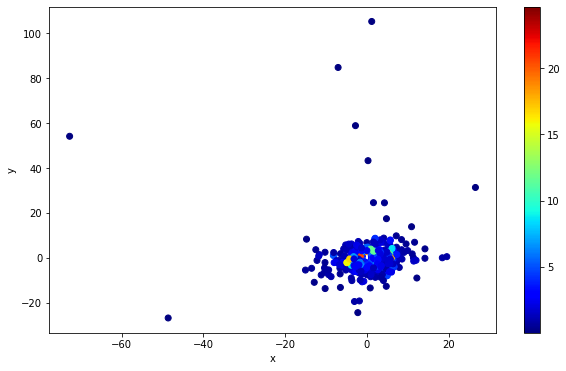

In [101]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)



anomaly_score = 1/ distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [102]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
128,-1.408451,-2.461538,24.642691
330,-1.369863,-2.448980,24.642691
79,-1.328021,-2.459016,23.240292
221,-3.110048,-3.910615,23.093965
277,-3.112840,-3.867403,23.093965


k = 5

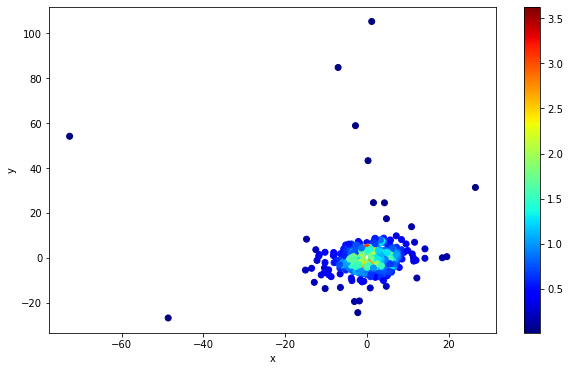

In [15]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)



anomaly_score = 1/ distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [16]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
132,1.075269,-2.484472,3.628761
62,-1.477105,-0.547945,3.405075
105,-1.499250,-0.586510,3.215318
116,1.259843,-2.380952,3.208860
52,-1.369863,-2.046036,3.120812


Density is the inverse of the average distance to k neighbours (for k = 1, 2, 5)

k = 1

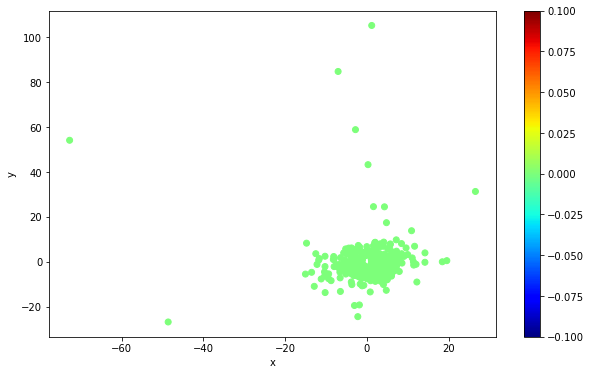

In [17]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)



anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [18]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,11.401869,0.000000,0.0
2,5.872483,-4.740406,0.0
3,-12.202853,-1.184834,0.0
4,7.942238,-4.316547,0.0
5,-10.367893,-4.511278,0.0


For k = 1 the distances between the points is always 0 so they cannot be inverted

k = 2

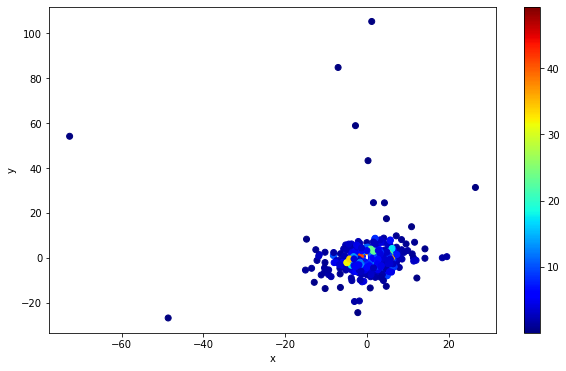

In [104]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)


#average distance
anomaly_score = 1 / ((distances[:,0] + distances[:, 1])/2)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [105]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
128,-1.408451,-2.461538,49.285382
330,-1.369863,-2.448980,49.285382
79,-1.328021,-2.459016,46.480584
221,-3.110048,-3.910615,46.187930
277,-3.112840,-3.867403,46.187930


k = 5

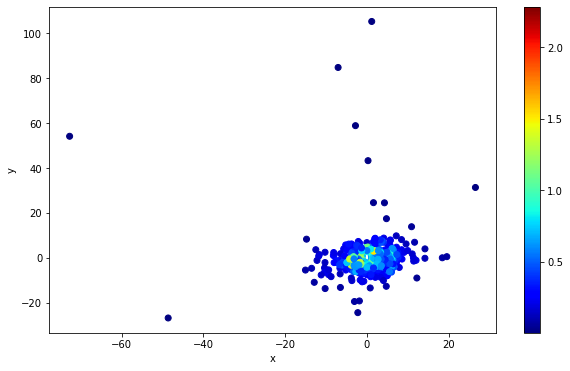

In [106]:
N,d = compoundData.shape
compounds = pd.DataFrame(100*np.divide(compoundData.iloc[1:,:].values-compoundData.iloc[:N-1,:].values, compoundData.iloc[:N-1,:].values),
                    columns=compoundData.columns, index=compoundData.iloc[1:].index)


knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(compounds.values)
distances, indices = nbrs.kneighbors(compounds.values)


#average distance
anomaly_score = 1 / (distances[:,0] + distances[:, 1] + distances[:, 2] + distances[:, 3] + distances[:, 4]/5)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(compounds.x,compounds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [107]:
anom = pd.DataFrame(anomaly_score, index=compounds.index, columns=['Anomaly score'])
result = pd.concat((compounds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
128,-1.408451,-2.461538,2.283878
330,-1.369863,-2.448980,2.268721
79,-1.328021,-2.459016,1.896390
331,-0.833333,-3.765690,1.870092
233,-0.931677,-3.816794,1.862563


Flame data

Density is the inverse of distance to k’th neighbour

k = 1

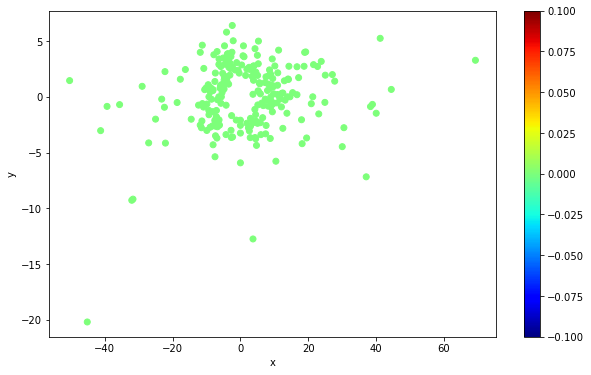

In [23]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)

knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [24]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,-27.027027,-4.136691,0.0
2,3.703704,-12.757974,0.0
3,-39.285714,-0.860215,0.0
4,-41.176471,-3.036876,0.0
5,30.000000,-4.474273,0.0


k = 2

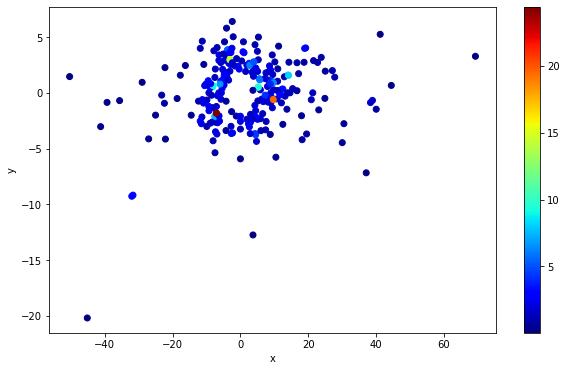

In [110]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = 1 / distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [111]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
105,-7.103825,-1.827676,24.425693
206,-7.070707,-1.803607,24.425693
72,9.629630,-0.613497,19.546904
228,9.677419,-0.595238,19.546904
83,-3.105590,3.030303,14.269081


k = 5

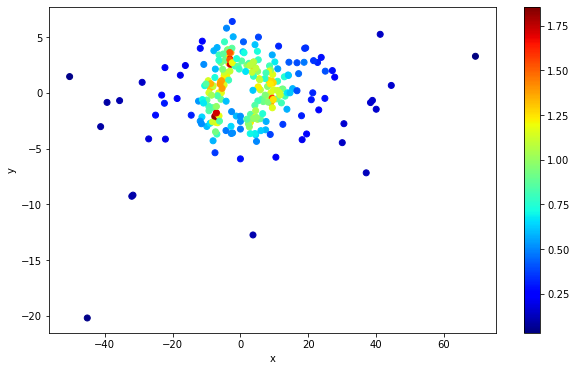

In [112]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = 1 /  distances[:, knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [113]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
50,-7.438017,-2.197802,1.855975
71,-7.534247,-2.102102,1.813786
101,-2.955665,2.542373,1.734067
206,-7.070707,-1.803607,1.726688
83,-3.105590,3.030303,1.699045


Density is the inverse of the average distance to k neighbours (for k = 1, 2, 5)

k = 1

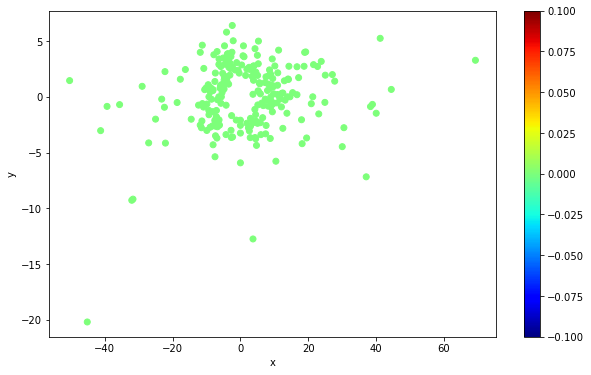

In [29]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)

knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [30]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,-27.027027,-4.136691,0.0
2,3.703704,-12.757974,0.0
3,-39.285714,-0.860215,0.0
4,-41.176471,-3.036876,0.0
5,30.000000,-4.474273,0.0


For k = 1 the distances between the points is always 0 so they cannot be inverted

k = 2

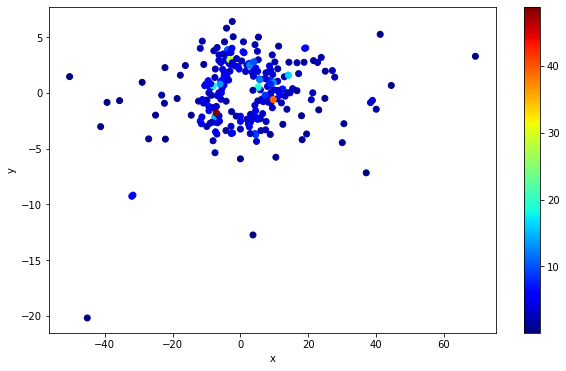

In [31]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = 1 /  ((distances[:, 0] + distances[:, 1]) /2)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [32]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
105,-7.103825,-1.827676,48.851386
206,-7.070707,-1.803607,48.851386
72,9.629630,-0.613497,39.093808
228,9.677419,-0.595238,39.093808
83,-3.105590,3.030303,28.538162


k=5

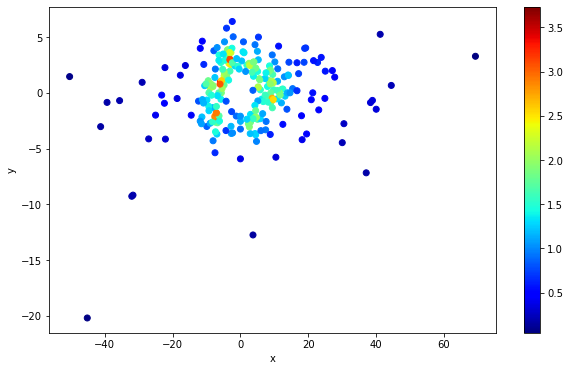

In [114]:
N,d = flameData.shape
flames = pd.DataFrame(100*np.divide(flameData.iloc[1:,:].values-flameData.iloc[:N-1,:].values, flameData.iloc[:N-1,:].values),
                    columns=flameData.columns, index=flameData.iloc[1:].index)

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(flames.values)
distances, indices = nbrs.kneighbors(flames.values)

anomaly_score = 1 /  ((distances[:, 0] + distances[:, 1] + distances[:, 2] + distances[:, 3] + distances[:, 4]) /5)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(flames.x,flames.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [115]:
anom = pd.DataFrame(anomaly_score, index=flames.index, columns=['Anomaly score'])
result = pd.concat((flames,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
111,-5.857741,0.821918,3.735914
124,-5.882353,0.997506,3.313242
125,-3.125000,2.962963,3.129956
50,-7.438017,-2.197802,3.109362
237,-6.000000,0.779727,3.063848


Pathbased Data

Density is the inverse of distance to k’th neighbour

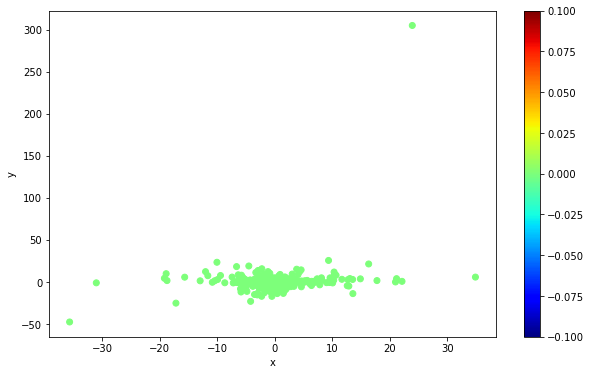

In [37]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [38]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,-2.666667,-6.930693,0.0
2,-10.045662,23.404255,0.0
3,-0.507614,-0.862069,0.0
4,-6.632653,18.260870,0.0
5,-5.464481,-2.941176,0.0


k = 2

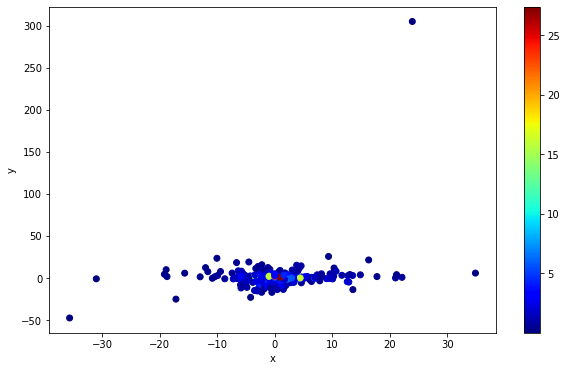

In [46]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = 1/ distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [47]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
154,0.980392,0.898204,27.384061
289,0.983607,0.934579,27.384061
47,0.000000,2.138158,23.613023
284,0.000000,2.095808,23.613023
127,0.199203,2.040816,23.278854


k = 5

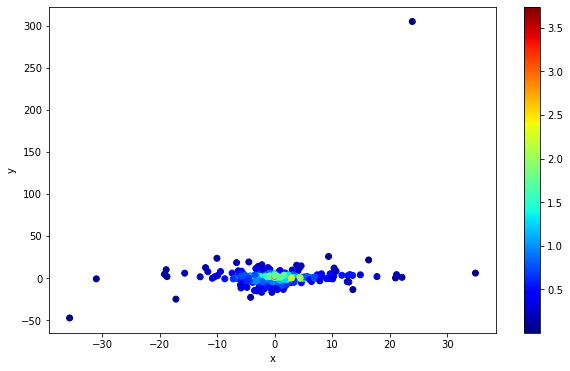

In [48]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = 1/ distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [49]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
47,0.000000,2.138158,3.740550
284,0.000000,2.095808,3.229037
220,2.403846,0.000000,3.149073
221,2.347418,-0.312500,3.101511
151,2.268041,0.000000,2.989707


Density is the inverse of the average distance to k neighbours (for k = 1, 2, 5)

k = 1

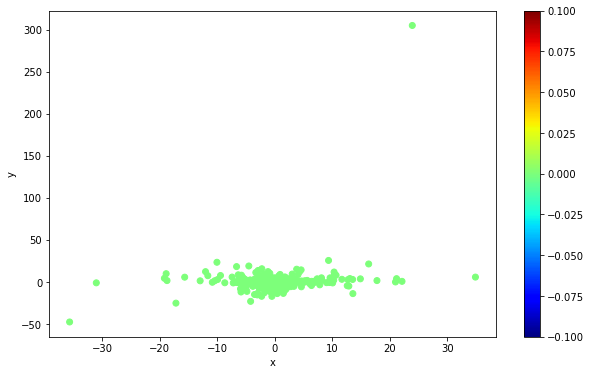

In [56]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [57]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,-2.666667,-6.930693,0.0
2,-10.045662,23.404255,0.0
3,-0.507614,-0.862069,0.0
4,-6.632653,18.260870,0.0
5,-5.464481,-2.941176,0.0


For k = 1 the distances between the points is always 0 so they cannot be inverted

k = 2

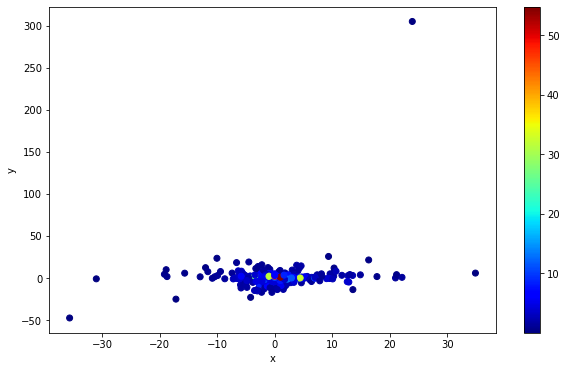

In [60]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = 1/ ((distances[:, 0] + distances[:, 1])/2) 

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [61]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
154,0.980392,0.898204,54.768123
289,0.983607,0.934579,54.768123
47,0.000000,2.138158,47.226047
284,0.000000,2.095808,47.226047
127,0.199203,2.040816,46.557708


k = 5

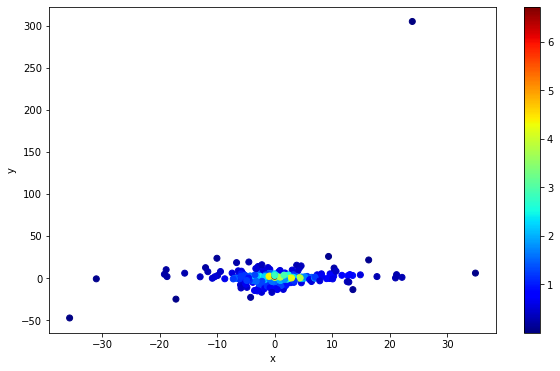

In [116]:
N,d = pathbasedData.shape
pathbaseds = pd.DataFrame(100*np.divide(pathbasedData.iloc[1:,:].values-pathbasedData.iloc[:N-1,:].values, pathbasedData.iloc[:N-1,:].values),
                    columns=pathbasedData.columns, index=pathbasedData.iloc[1:].index)


knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(pathbaseds.values)
distances, indices = nbrs.kneighbors(pathbaseds.values)

anomaly_score = 1/ ((distances[:, 0] + distances[:, 1] + distances[:, 2] + distances[:, 3] + distances[:, 4])/5) 

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(pathbaseds.x,pathbaseds.y,c=anomaly_score,cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(p)
plt.show()

In [117]:
anom = pd.DataFrame(anomaly_score, index=pathbaseds.index, columns=['Anomaly score'])
result = pd.concat((pathbaseds,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
47,0.000000,2.138158,6.721007
284,0.000000,2.095808,6.540982
183,0.205339,2.083333,5.929466
127,0.199203,2.040816,5.637818
132,0.184502,0.343643,5.600401
